## 

In [1]:
import os 
import shutil

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Open PsychoPy metadata csv

def openPsychoPyExperimentMetadata(path):
    df = pd.read_csv(path)
    df = df[['videos','participant','sessions.thisIndex']]
    df.columns.values[2] = 'session'
    return df

def buildOneHotEncoding(row):
    filepath = row['videos']
    filepath = filepath.split('/')[1:-1]
    filepath[0] = filepath[0].split('_')[1:]
    row['init'] = int(filepath[0][0][-1])
    row['perturbation'] = 1 if filepath[0][-1] == "perturbation" else 0
    row["delta"] = 0 if filepath[-1] == "original" else int(filepath[-1][-1])

    return row

def retrieveGazePosition(row):
    folder = f"{row['participant']}_{row['session']}_"
    folder += f'00{row.name}' if row.name < 10 else f'0{row.name}'
    csv_path = 'pupil_data/' + folder + '/gaze_positions.csv'
    df = pd.read_csv(csv_path,sep=(','))

    x = df.norm_pos_x.to_list()
    y = df.norm_pos_y.to_list()

    row['norm_pos_x'] = x
    row['norm_pos_y'] = y
    return row



In [3]:
data = openPsychoPyExperimentMetadata('data/262320_PFE_2023-11-21_16h25.39.111.csv')
data = data.apply(buildOneHotEncoding, axis = 1)
data.head()

,videos,participant,session,init,perturbation,delta
0,video/Sphere_init1_speed1_perturbation/delta2/...,262320,0,1,1,2
1,video/Sphere_init3_speed1_perturbation/delta2/...,262320,0,3,1,2
2,video/Sphere_init4_speed1_perturbation/origina...,262320,0,4,1,0
3,video/Sphere_init3_speed1_perturbation/origina...,262320,0,3,1,0
4,video/Sphere_init4_speed1/delta2/0001-0150.avi,262320,0,4,0,2


In [2]:
#Script to copy pupil exported csv data to pupil_data folder

# Source and destination paths
rec_folder = '/Users/Quentin/recordings/2023_11_10/'
destination_root = 'pupil_data'
# Get a list of all folders in the source directory
folders_to_copy = [folder for folder in os.listdir(rec_folder) if os.path.isdir(os.path.join(rec_folder, folder)) and int(folder)>18]
print(folders_to_copy)
# # Copy each folder to the destination directory with a new name to avoid conflicts
for folder in folders_to_copy:
    source_folder_path = os.path.join(rec_folder, folder)
    source_folder_path += '/exports/000'
    
    # Generate a new folder name (you can modify this logic if needed)

    
    destination_folder_path = os.path.join(destination_root, folder)
    
    # Copy the entire folder to the new destination
    shutil.copytree(source_folder_path, destination_folder_path)

print("Folders copied successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Quentin/recordings/2023_11_10/'

In [4]:
data = data[:5].apply(retrieveGazePosition, axis = 1)
data.head()

,videos,participant,session,init,perturbation,delta,norm_pos_x,norm_pos_y
0,video/Sphere_init1_speed1_perturbation/delta2/...,262320,0,1,1,2,"[0.4629043003040466, 0.462814364512867, 0.4624...","[0.6852315639797573, 0.6835256262084172, 0.684..."
1,video/Sphere_init3_speed1_perturbation/delta2/...,262320,0,3,1,2,"[0.3428103401930664, 0.3416753100492106, 0.341...","[0.5049321993855218, 0.5037956971050905, 0.503..."
2,video/Sphere_init4_speed1_perturbation/origina...,262320,0,4,1,0,"[0.4597041601218288, 0.4584007267405258, 0.458...","[0.7381066911115367, 0.7380169647668574, 0.736..."
3,video/Sphere_init3_speed1_perturbation/origina...,262320,0,3,1,0,"[0.3582823305178435, 0.358201653403985, 0.3578...","[0.5933989020296317, 0.5934692550895664, 0.592..."
4,video/Sphere_init4_speed1/delta2/0001-0150.avi,262320,0,4,0,2,"[0.2494185599925613, 0.2497454845925567, 0.251...","[0.8786432404708732, 0.8806806380797337, 0.872..."


In [18]:
init1 = data[(data['init']==1)]

init2 = data[(data['init']==2)]

init3 = data[(data['init']==3)]

init4 = data[(data['init']==4)]

init = [init1 , init2 , init3 , init4]

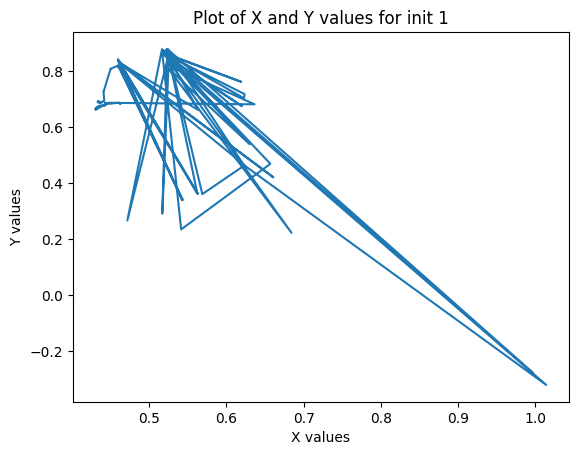

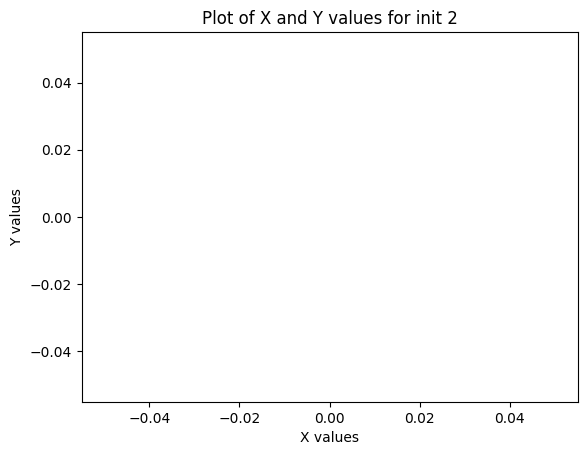

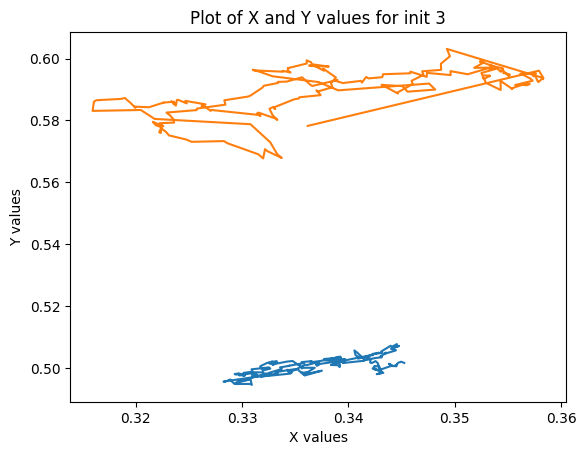

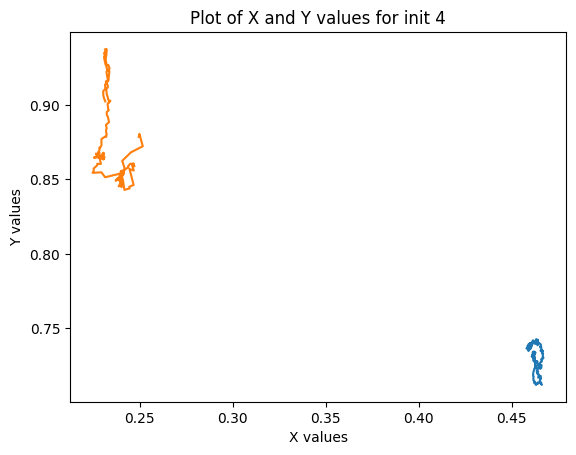

In [23]:
def createPlot(row):
    x = row.norm_pos_x
    y = row.norm_pos_y

    plt.plot(x,y)


for i , df in enumerate(init):
    df.apply(createPlot, axis = 1)        
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'Plot of X and Y values for init {i+1}')
    plt.show()